In [24]:
import django
import os
from cover.views import *
from IPython.display import Image as DisplayImage

os.environ.setdefault('DJANGO_SETTINGS_MODULE', 'orly.settings.dev')
django.setup()

In [132]:
def image_generator(data):
    title = data['title']
    top_text = data['top_text']
    author = data['author']
    animal_code = data['animal_code']
    color_index = data['color_code']
    guide_text = data['guide_text']
    guide_text_placement = data['guide_text_placement']

    animal_path = settings.ROOT('assets', 'animal', '{}.png'.format(animal_code))
    animal_im = Image.open(animal_path)
    animal_im = animal_im.resize((400, 400))

    color = COLOR_CODE[int(color_index)]

    canvas_im = Image.new('RGB', (500, 700), (255, 255, 255, 255))
    sample_im = Image.open('orly-sample.png')  # 가이드 이미지 샘플
#     canvas_im.paste(sample_im, (0, 0))  # 가이드 이미지 샘플
    
    canvas_im.paste(animal_im, (50, 40))

    ttf_path = settings.ROOT('assets', 'fonts', 'NanumGothicCoding.ttf')  # get a font
    draw = ImageDraw.Draw(canvas_im)  # get a drawing context

    # rectangle_top
    draw.rectangle([20, 0, 480, 10], fill=color)

    # rectangle_middle
    draw.rectangle([20, 400, 480, 510], fill=color)

    # Title
    fnt = ImageFont.truetype(ttf_path, 70)
    draw.text((45, 430), title, font=fnt, fill=(255, 255, 255, 255))

    # Top text
    fnt = ImageFont.truetype(ttf_path, 20)
    draw.text((160, 13), top_text, font=fnt, fill=(0, 0, 0, 255))

    # Author
    fnt = ImageFont.truetype(ttf_path, 25)
    draw.text((360, 655), author, font=fnt, fill=(0, 0, 0, 255))

    # guide_text
    fnt = ImageFont.truetype(ttf_path, 25)
    draw.text((140, 510), guide_text, font=fnt, fill=(0, 0, 0, 255))

    response = HttpResponse(content_type='image/png')
    canvas_im.save(response, format='PNG')
    return response

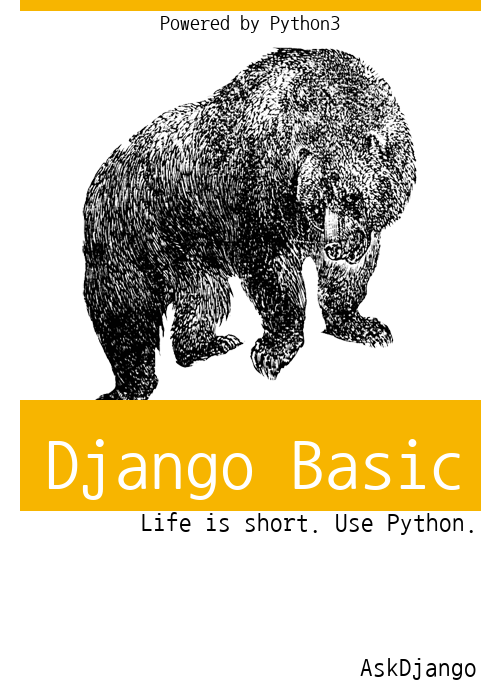

In [133]:
r = image_generator({
    'title':'Django Basic',
    'top_text': 'Powered by Python3',
    'author': 'AskDjango',
    'animal_code': '1',
    'color_code': '8',
    'guide_text': 'Life is short. Use Python.',
    'guide_text_placement': 'bottom_right'
})
DisplayImage(r.getvalue())